<a href="https://colab.research.google.com/github/arielabade/dataAnalysis/blob/main/globalWarming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Upload de Dados
**bold text**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras as kr
import matplotlib.pyplot as plt

In [ ]:
pip install scikit-learn


In [ ]:
# Transformar em csv
data = pd.read_csv('/content/drive/My Drive/Datasets/temperaturas - Environment_Temperature_change_E_All_Data_NOFLAG.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9656 non-null   int64  
 1   Area          9656 non-null   object 
 2   Months Code   9656 non-null   int64  
 3   Months        9656 non-null   object 
 4   Element Code  9656 non-null   int64  
 5   Element       9656 non-null   object 
 6   Unit          9656 non-null   object 
 7   Y1961         8287 non-null   float64
 8   Y1962         8322 non-null   float64
 9   Y1963         8294 non-null   float64
 10  Y1964         8252 non-null   float64
 11  Y1965         8281 non-null   float64
 12  Y1966         8364 non-null   float64
 13  Y1967         8347 non-null   float64
 14  Y1968         8345 non-null   float64
 15  Y1969         8326 non-null   float64
 16  Y1970         8308 non-null   float64
 17  Y1971         8303 non-null   float64
 18  Y1972         8323 non-null 

In [ ]:
data

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,OECD,7018,Jun–Jul–Aug,6078,Standard Deviation,°C,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,OECD,7019,Sep–Oct–Nov,7271,Temperature change,°C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,5873,OECD,7019,Sep–Oct–Nov,6078,Standard Deviation,°C,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,5873,OECD,7020,Meteorological year,7271,Temperature change,°C,0.165,-0.009,0.134,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


# 2) Análise Exploratória

In [ ]:
column_name = 'Area'
# Exibir os valores únicos da coluna sem a contagem
unique_values = data[column_name].unique()
print(unique_values)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belgium-Luxembourg' 'Belize'
 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'China'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Christmas Island' 'Cocos (Keeling) Islands'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cōte d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Czechoslovakia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egyp

In [ ]:
column_name = 'Area'
most_common_values = data[column_name].value_counts().head()
print(most_common_values)

Area
Afghanistan                  34
Saint Pierre and Miquelon    34
Senegal                      34
Saudi Arabia                 34
Sao Tome and Principe        34
Name: count, dtype: int64


In [ ]:
data.describe()

,Area Code,Months Code,Element Code,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,9656.000000,9656.000000,9656.00000,8287.000000,8322.000000,8294.000000,8252.000000,8281.000000,8364.000000,8347.000000,...,8435.000000,8437.000000,8350.000000,8427.000000,8377.000000,8361.000000,8348.000000,8366.000000,8349.000000,8365.000000
mean,821.806338,7009.882353,6674.50000,0.402433,0.315527,0.317393,0.269382,0.217839,0.376419,0.263239,...,0.884504,0.768488,0.788930,0.829647,0.913872,1.018816,1.081491,1.003342,1.010832,1.094599
std,1781.072213,6.038255,596.53089,0.701567,0.713777,0.853133,0.749216,0.739418,0.737370,0.725421,...,0.878303,0.750631,0.858586,0.713753,0.815933,0.840189,0.877399,0.809800,0.872199,0.853953
min,1.000000,7001.000000,6078.00000,-4.018000,-5.391000,-8.483000,-7.309000,-4.728000,-8.147000,-6.531000,...,-6.072000,-4.854000,-5.785000,-3.642000,-5.367000,-4.068000,-3.306000,-3.584000,-2.216000,-2.644000
25%,78.000000,7005.000000,6078.00000,0.057000,-0.033000,0.030250,-0.102500,-0.214000,0.055000,-0.169000,...,0.392000,0.365000,0.372250,0.408500,0.418000,0.437000,0.457000,0.443000,0.434000,0.455000
50%,153.500000,7009.000000,6674.50000,0.366000,0.333000,0.355000,0.326000,0.303000,0.360000,0.313000,...,0.771000,0.640000,0.651000,0.719000,0.745000,0.858000,0.949000,0.865000,0.810000,0.939000
75%,226.250000,7016.000000,7271.00000,0.676500,0.627000,0.647750,0.609000,0.584000,0.660250,0.601000,...,1.276500,1.091000,1.108000,1.126000,1.190000,1.389000,1.496000,1.364750,1.341000,1.508000
max,5873.000000,7020.000000,7271.00000,5.771000,4.373000,4.666000,5.233000,5.144000,5.771000,4.768000,...,7.190000,6.531000,10.826000,6.738000,11.759000,7.590000,10.478000,7.389000,9.228000,7.215000


# 3) Filtragem

In [ ]:
import pandas as pd
filtered_temperature_change = data.loc[data['Element'] == 'Temperature change']
print(filtered_temperature_change)

      Area Code         Area  Months Code               Months  Element Code  \
0             2  Afghanistan         7001              January          7271   
2             2  Afghanistan         7002             February          7271   
4             2  Afghanistan         7003                March          7271   
6             2  Afghanistan         7004                April          7271   
8             2  Afghanistan         7005                  May          7271   
...         ...          ...          ...                  ...           ...   
9646       5873         OECD         7016          Dec–Jan–Feb          7271   
9648       5873         OECD         7017          Mar–Apr–May          7271   
9650       5873         OECD         7018          Jun–Jul–Aug          7271   
9652       5873         OECD         7019          Sep–Oct–Nov          7271   
9654       5873         OECD         7020  Meteorological year          7271   

                 Element Unit  Y1961  Y

In [ ]:
filtered_temperature_change

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,2,Afghanistan,7004,April,7271,Temperature change,°C,-1.709,0.117,0.919,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,2,Afghanistan,7005,May,7271,Temperature change,°C,1.412,-0.092,-0.690,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9646,5873,OECD,7016,Dec–Jan–Feb,7271,Temperature change,°C,0.561,-0.362,-0.222,...,1.272,0.770,1.709,1.327,0.686,1.307,2.636,1.884,1.453,1.527
9648,5873,OECD,7017,Mar–Apr–May,7271,Temperature change,°C,-0.038,-0.189,0.141,...,1.742,0.390,1.442,0.475,0.778,1.191,1.928,1.237,1.241,1.352
9650,5873,OECD,7018,Jun–Jul–Aug,7271,Temperature change,°C,0.101,0.052,-0.047,...,1.012,0.954,1.061,1.119,0.779,0.958,1.303,1.081,1.078,1.078
9652,5873,OECD,7019,Sep–Oct–Nov,7271,Temperature change,°C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233


In [ ]:
import pandas as pd
# Contar a frequência de cada valor na coluna 'Area' e obter o valor mais frequente
most_common_area = data['Area'].value_counts().idxmax()
# Exibir a área com mais linhas
print(f"A área com mais linhas é: {most_common_area}")

A área com mais linhas é: Afghanistan


In [ ]:
import pandas as pd
# Contar a frequência de cada valor na coluna 'Area' e obter a contagem do valor mais frequente
most_common_area_count = data['Area'].value_counts().max()
# Exibir a quantidade de linhas da área com mais ocorrências
print(f"A quantidade de linhas da área com mais ocorrências é: {most_common_area_count}")



A quantidade de linhas da área com mais ocorrências é: 34


In [ ]:
# Filtrar apenas as linhas relacionadas ao Afeganistão
afghanistan_data = filtered_temperature_change.loc[filtered_temperature_change['Area'] == 'Afghanistan']
print(afghanistan_data)

    Area Code         Area  Months Code               Months  Element Code  \
0           2  Afghanistan         7001              January          7271   
2           2  Afghanistan         7002             February          7271   
4           2  Afghanistan         7003                March          7271   
6           2  Afghanistan         7004                April          7271   
8           2  Afghanistan         7005                  May          7271   
10          2  Afghanistan         7006                 June          7271   
12          2  Afghanistan         7007                 July          7271   
14          2  Afghanistan         7008               August          7271   
16          2  Afghanistan         7009            September          7271   
18          2  Afghanistan         7010              October          7271   
20          2  Afghanistan         7011             November          7271   
22          2  Afghanistan         7012             December    

In [ ]:
afghanistan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 0 to 32
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     17 non-null     int64  
 1   Area          17 non-null     object 
 2   Months Code   17 non-null     int64  
 3   Months        17 non-null     object 
 4   Element Code  17 non-null     int64  
 5   Element       17 non-null     object 
 6   Unit          17 non-null     object 
 7   Y1961         17 non-null     float64
 8   Y1962         17 non-null     float64
 9   Y1963         17 non-null     float64
 10  Y1964         17 non-null     float64
 11  Y1965         17 non-null     float64
 12  Y1966         17 non-null     float64
 13  Y1967         17 non-null     float64
 14  Y1968         17 non-null     float64
 15  Y1969         17 non-null     float64
 16  Y1970         17 non-null     float64
 17  Y1971         17 non-null     float64
 18  Y1972         17 non-null     float64

# 4) Limpeza de Dados

In [ ]:
afghanistan_data = afghanistan_data.drop(['Area Code', 'Months Code', 'Element Code'], axis=1)
print(afghanistan_data.head())

          Area    Months             Element Unit  Y1961  Y1962  Y1963  Y1964  \
0  Afghanistan   January  Temperature change   °C  0.777  0.062  2.744 -5.232   
2  Afghanistan  February  Temperature change   °C -1.743  2.465  3.919 -0.202   
4  Afghanistan     March  Temperature change   °C  0.516  1.336  0.403  1.659   
6  Afghanistan     April  Temperature change   °C -1.709  0.117  0.919 -0.533   
8  Afghanistan       May  Temperature change   °C  1.412 -0.092 -0.690 -0.160   

   Y1965  Y1966  ...  Y2010  Y2011  Y2012  Y2013  Y2014  Y2015  Y2016  Y2017  \
0  1.868  3.629  ...  3.601  1.179 -0.583  1.233  1.755  1.943  3.416  1.201   
2 -0.096  3.397  ...  1.212  0.321 -3.201  1.494 -3.187  2.699  2.251 -0.323   
4 -0.909 -0.069  ...  3.390  0.748 -0.527  2.246 -0.076 -0.497  2.296  0.834   
6 -1.816 -1.192  ...  2.591  1.712  1.417 -0.052  0.585  1.589  0.980  1.252   
8 -0.190 -0.192  ...  1.419  3.643  0.909  1.201  0.959  1.862  3.246  3.280   

   Y2018  Y2019  
0  1.996  2.95

In [ ]:
afghanistan_data = afghanistan_data.reset_index(drop=True)

In [ ]:
afghanistan_data

,Area,Months,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,Temperature change,°C,0.777,0.062,2.744,-5.232,1.868,3.629,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,February,Temperature change,°C,-1.743,2.465,3.919,-0.202,-0.096,3.397,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
2,Afghanistan,March,Temperature change,°C,0.516,1.336,0.403,1.659,-0.909,-0.069,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
3,Afghanistan,April,Temperature change,°C,-1.709,0.117,0.919,-0.533,-1.816,-1.192,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
4,Afghanistan,May,Temperature change,°C,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647
5,Afghanistan,June,Temperature change,°C,-0.058,-1.061,1.164,-0.519,-0.422,1.274,...,0.594,2.450,0.305,1.924,1.492,1.289,1.586,2.002,1.786,-0.289
6,Afghanistan,July,Temperature change,°C,0.884,0.292,0.348,-0.142,0.116,-0.267,...,0.494,0.532,0.973,1.126,0.671,1.092,1.079,0.901,1.815,1.885
7,Afghanistan,August,Temperature change,°C,0.391,-0.220,0.094,0.671,-0.686,0.049,...,0.587,1.930,1.356,0.886,0.706,0.589,0.311,0.102,0.982,0.773
8,Afghanistan,September,Temperature change,°C,1.445,-1.797,0.163,-0.253,-0.661,-0.403,...,0.030,1.408,0.495,2.586,2.268,0.172,3.016,0.930,1.063,2.004
9,Afghanistan,October,Temperature change,°C,-1.102,-0.968,1.654,-2.839,2.211,-0.428,...,2.927,1.339,0.827,1.691,1.134,1.894,0.792,2.092,-0.103,1.264


In [ ]:
afghanistan_data_12_months =  afghanistan_data.head(12)
print(afghanistan_data_12_months)

           Area     Months             Element Unit  Y1961  Y1962  Y1963  \
0   Afghanistan    January  Temperature change   °C  0.777  0.062  2.744   
1   Afghanistan   February  Temperature change   °C -1.743  2.465  3.919   
2   Afghanistan      March  Temperature change   °C  0.516  1.336  0.403   
3   Afghanistan      April  Temperature change   °C -1.709  0.117  0.919   
4   Afghanistan        May  Temperature change   °C  1.412 -0.092 -0.690   
5   Afghanistan       June  Temperature change   °C -0.058 -1.061  1.164   
6   Afghanistan       July  Temperature change   °C  0.884  0.292  0.348   
7   Afghanistan     August  Temperature change   °C  0.391 -0.220  0.094   
8   Afghanistan  September  Temperature change   °C  1.445 -1.797  0.163   
9   Afghanistan    October  Temperature change   °C -1.102 -0.968  1.654   
10  Afghanistan   November  Temperature change   °C -0.540 -2.171  0.584   
11  Afghanistan   December  Temperature change   °C  0.600 -0.721 -0.603   

    Y1964  

In [ ]:
afghanistan_data_12_months

,Area,Months,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,Afghanistan,January,Temperature change,°C,0.777,0.062,2.744,-5.232,1.868,3.629,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,February,Temperature change,°C,-1.743,2.465,3.919,-0.202,-0.096,3.397,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
2,Afghanistan,March,Temperature change,°C,0.516,1.336,0.403,1.659,-0.909,-0.069,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
3,Afghanistan,April,Temperature change,°C,-1.709,0.117,0.919,-0.533,-1.816,-1.192,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
4,Afghanistan,May,Temperature change,°C,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647
5,Afghanistan,June,Temperature change,°C,-0.058,-1.061,1.164,-0.519,-0.422,1.274,...,0.594,2.450,0.305,1.924,1.492,1.289,1.586,2.002,1.786,-0.289
6,Afghanistan,July,Temperature change,°C,0.884,0.292,0.348,-0.142,0.116,-0.267,...,0.494,0.532,0.973,1.126,0.671,1.092,1.079,0.901,1.815,1.885
7,Afghanistan,August,Temperature change,°C,0.391,-0.220,0.094,0.671,-0.686,0.049,...,0.587,1.930,1.356,0.886,0.706,0.589,0.311,0.102,0.982,0.773
8,Afghanistan,September,Temperature change,°C,1.445,-1.797,0.163,-0.253,-0.661,-0.403,...,0.030,1.408,0.495,2.586,2.268,0.172,3.016,0.930,1.063,2.004
9,Afghanistan,October,Temperature change,°C,-1.102,-0.968,1.654,-2.839,2.211,-0.428,...,2.927,1.339,0.827,1.691,1.134,1.894,0.792,2.092,-0.103,1.264


In [ ]:

anos = [str(ano) for ano in range(1961, 2020)]

# Renomeando as colunas
for coluna_atual, novo_nome in zip(afghanistan_data_12_months.columns[4:], anos):
    afghanistan_data_12_months.rename(columns={coluna_atual: novo_nome}, inplace=True)


<ipython-input-21-27004b89fea4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afghanistan_data_12_months.rename(columns={coluna_atual: novo_nome}, inplace=True)


In [ ]:
afghanistan_data_12_months

,Area,Months,Element,Unit,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,January,Temperature change,°C,0.777,0.062,2.744,-5.232,1.868,3.629,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,February,Temperature change,°C,-1.743,2.465,3.919,-0.202,-0.096,3.397,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
2,Afghanistan,March,Temperature change,°C,0.516,1.336,0.403,1.659,-0.909,-0.069,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
3,Afghanistan,April,Temperature change,°C,-1.709,0.117,0.919,-0.533,-1.816,-1.192,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
4,Afghanistan,May,Temperature change,°C,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647
5,Afghanistan,June,Temperature change,°C,-0.058,-1.061,1.164,-0.519,-0.422,1.274,...,0.594,2.450,0.305,1.924,1.492,1.289,1.586,2.002,1.786,-0.289
6,Afghanistan,July,Temperature change,°C,0.884,0.292,0.348,-0.142,0.116,-0.267,...,0.494,0.532,0.973,1.126,0.671,1.092,1.079,0.901,1.815,1.885
7,Afghanistan,August,Temperature change,°C,0.391,-0.220,0.094,0.671,-0.686,0.049,...,0.587,1.930,1.356,0.886,0.706,0.589,0.311,0.102,0.982,0.773
8,Afghanistan,September,Temperature change,°C,1.445,-1.797,0.163,-0.253,-0.661,-0.403,...,0.030,1.408,0.495,2.586,2.268,0.172,3.016,0.930,1.063,2.004
9,Afghanistan,October,Temperature change,°C,-1.102,-0.968,1.654,-2.839,2.211,-0.428,...,2.927,1.339,0.827,1.691,1.134,1.894,0.792,2.092,-0.103,1.264


In [ ]:
afghanistan_data_12_months.drop(columns=['Element', 'Unit'], inplace=True)

<ipython-input-23-19c9234d4670>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afghanistan_data_12_months.drop(columns=['Element', 'Unit'], inplace=True)


In [ ]:
afghanistan_data_12_months.drop(columns=['Area'], inplace=True)

<ipython-input-24-f72f85a0c6fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afghanistan_data_12_months.drop(columns=['Area'], inplace=True)


In [ ]:
afghanistan_data_12_months

,Months,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,January,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,-2.298,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,February,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,-3.167,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
2,March,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,2.481,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
3,April,-1.709,0.117,0.919,-0.533,-1.816,-1.192,-1.496,-0.590,-0.770,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
4,May,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,-1.307,-1.841,-0.977,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647
5,June,-0.058,-1.061,1.164,-0.519,-0.422,1.274,-0.722,0.292,-0.270,...,0.594,2.450,0.305,1.924,1.492,1.289,1.586,2.002,1.786,-0.289
6,July,0.884,0.292,0.348,-0.142,0.116,-0.267,0.332,-0.256,-0.024,...,0.494,0.532,0.973,1.126,0.671,1.092,1.079,0.901,1.815,1.885
7,August,0.391,-0.220,0.094,0.671,-0.686,0.049,0.055,-0.155,-0.442,...,0.587,1.930,1.356,0.886,0.706,0.589,0.311,0.102,0.982,0.773
8,September,1.445,-1.797,0.163,-0.253,-0.661,-0.403,0.583,-0.269,-0.847,...,0.030,1.408,0.495,2.586,2.268,0.172,3.016,0.930,1.063,2.004
9,October,-1.102,-0.968,1.654,-2.839,2.211,-0.428,-0.800,-0.611,1.103,...,2.927,1.339,0.827,1.691,1.134,1.894,0.792,2.092,-0.103,1.264


In [ ]:
afghanistan_data_12_months.set_index('Months', inplace=True)
afghanistan_data_12_months = afghanistan_data_12_months.T

In [ ]:
afghanistan_data_12_months

Months,January,February,March,April,May,June,July,August,September,October,November,December
1961,0.777,-1.743,0.516,-1.709,1.412,-0.058,0.884,0.391,1.445,-1.102,-0.540,0.600
1962,0.062,2.465,1.336,0.117,-0.092,-1.061,0.292,-0.220,-1.797,-0.968,-2.171,-0.721
1963,2.744,3.919,0.403,0.919,-0.690,1.164,0.348,0.094,0.163,1.654,0.584,-0.603
1964,-5.232,-0.202,1.659,-0.533,-0.160,-0.519,-0.142,0.671,-0.253,-2.839,-0.574,-3.636
1965,1.868,-0.096,-0.909,-1.816,-0.190,-0.422,0.116,-0.686,-0.661,2.211,1.820,-1.115
1966,3.629,3.397,-0.069,-1.192,-0.192,1.274,-0.267,0.049,-0.403,-0.428,-2.574,-0.327
1967,-1.432,0.296,-0.759,-1.496,-1.307,-0.722,0.332,0.055,0.583,-0.800,1.245,-0.347
1968,0.389,-2.055,0.496,-0.590,-1.841,0.292,-0.256,-0.155,-0.269,-0.611,0.471,0.056
1969,-2.298,-3.167,2.481,-0.770,-0.977,-0.270,-0.024,-0.442,-0.847,1.103,-0.742,1.985
1970,0.804,1.809,-0.915,1.439,1.864,0.544,-0.534,1.867,0.005,0.542,0.881,-0.186


# 4) Visualização de Dados

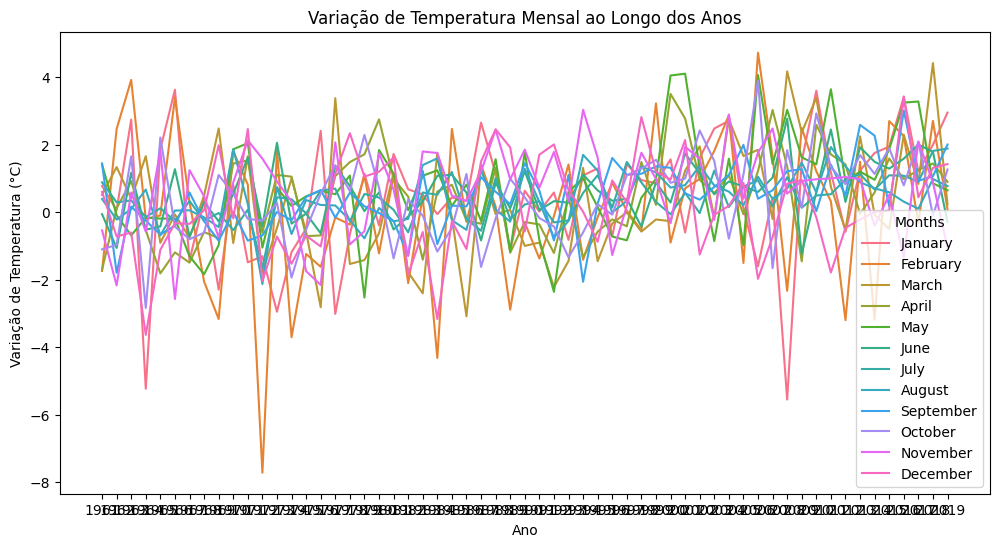

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.lineplot(data=afghanistan_data_12_months, dashes=False)
plt.title('Variação de Temperatura Mensal ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Variação de Temperatura (°C)')
plt.show()


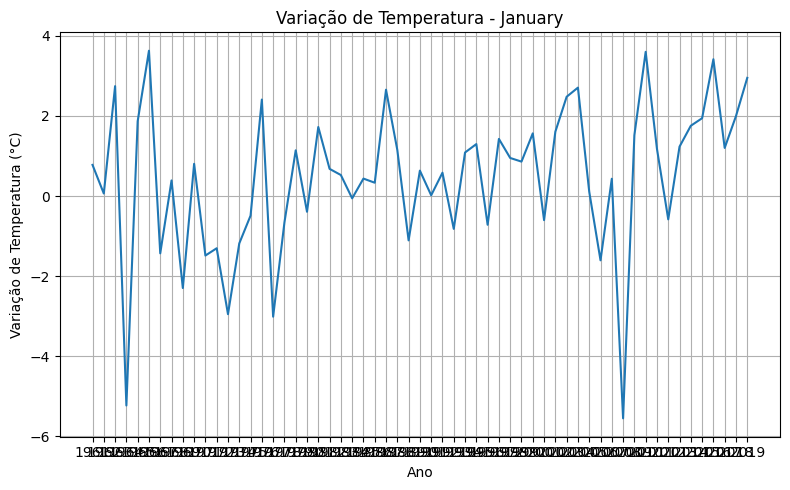

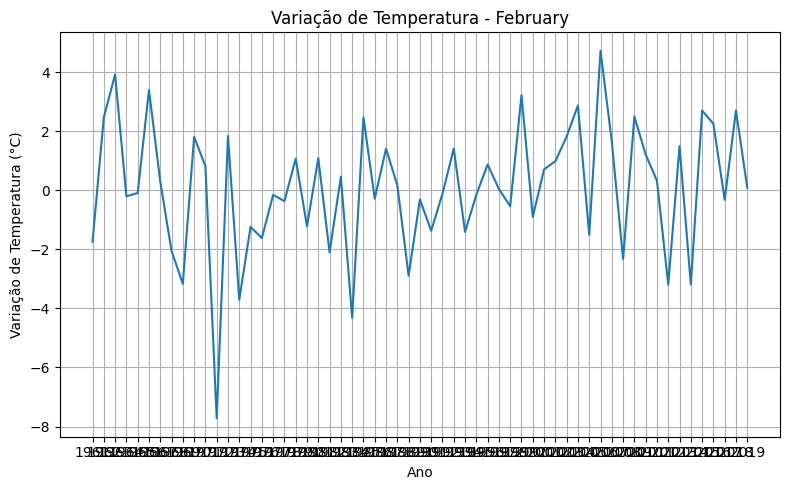

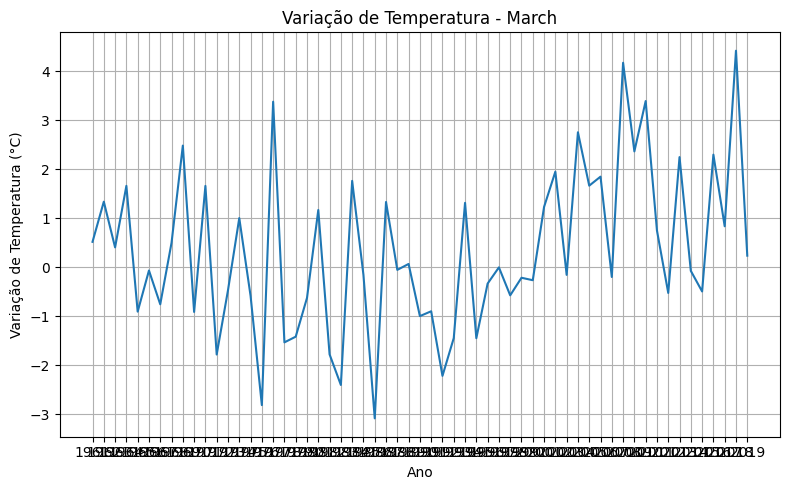

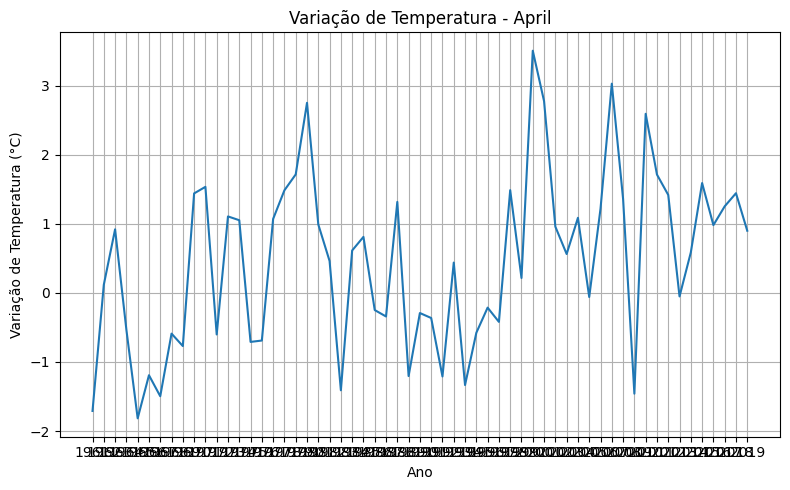

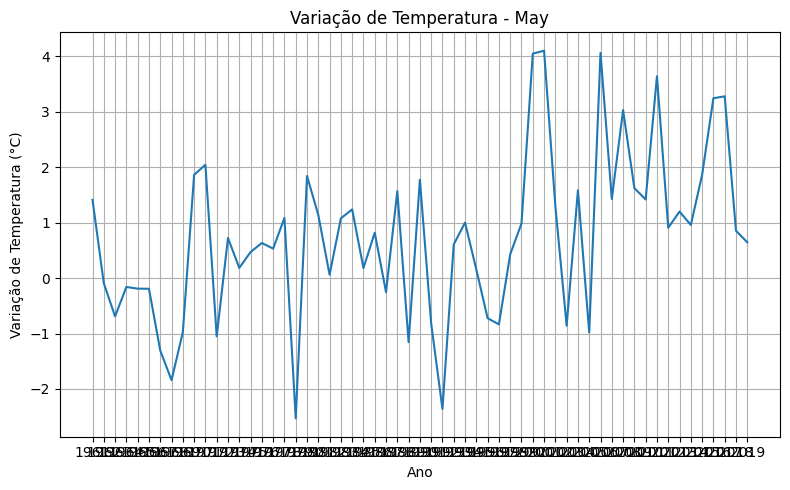

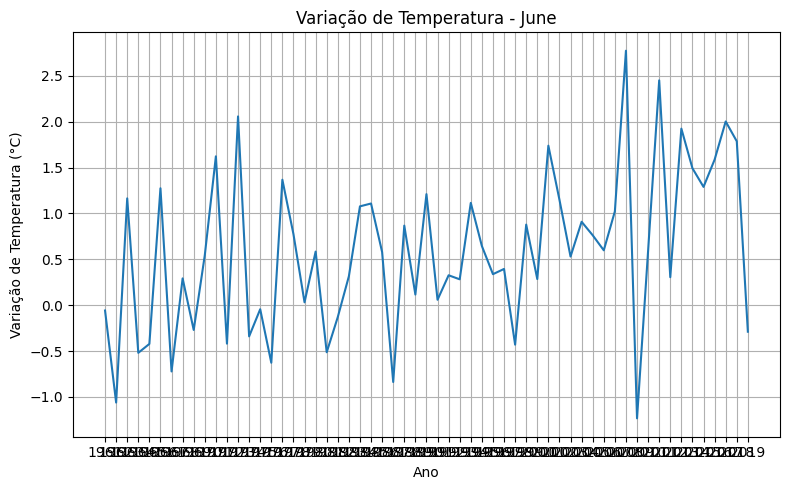

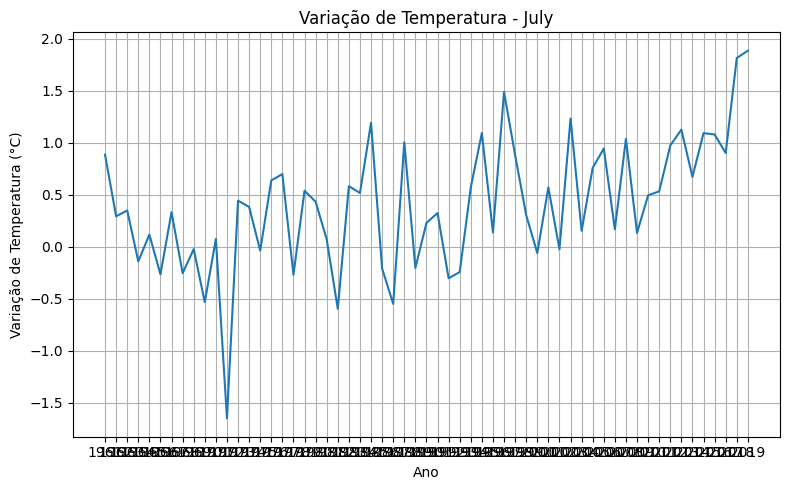

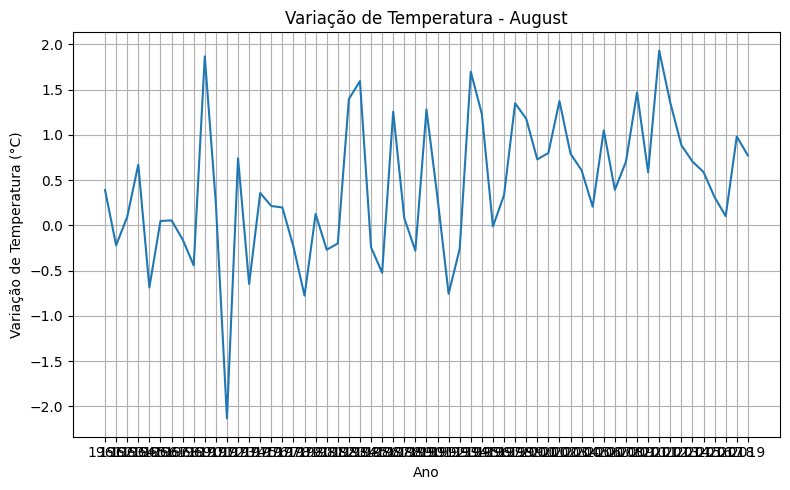

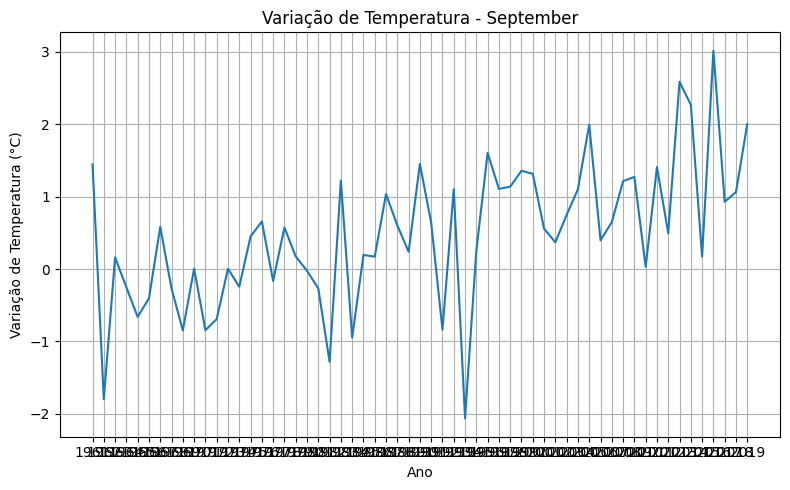

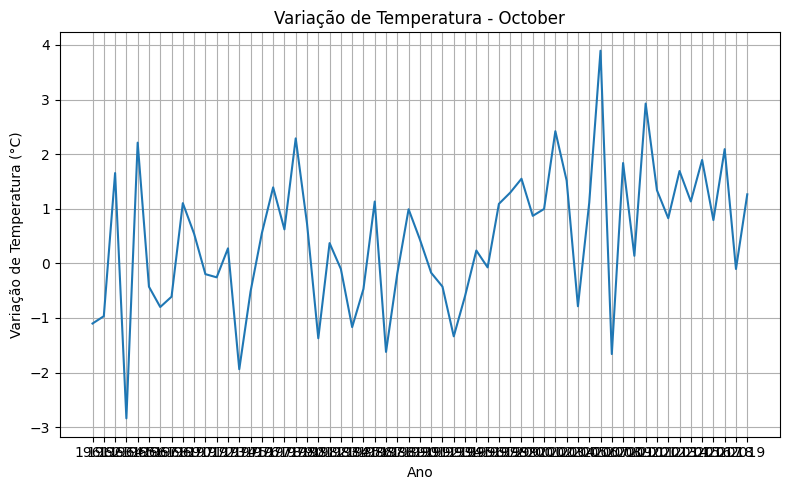

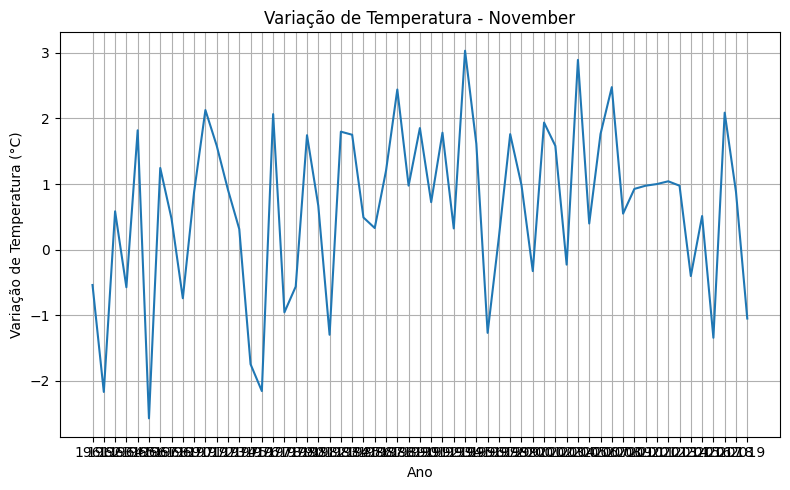

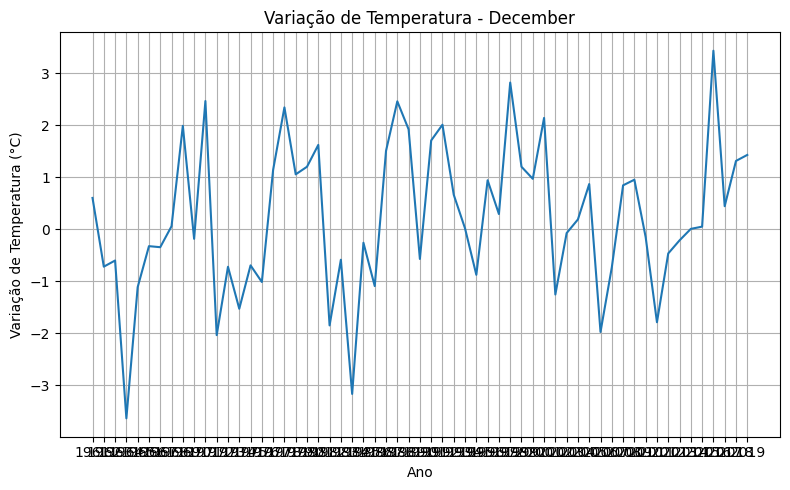

In [ ]:
# Lista dos meses em ordem
meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for mes in meses:
    plt.figure(figsize=(8, 5))  #
    sns.lineplot(data=afghanistan_data_12_months[mes])
    plt.title(f'Variação de Temperatura - {mes}')
    plt.xlabel('Ano')
    plt.ylabel('Variação de Temperatura (°C)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'grafico_variacao_temperatura_{mes}.png')
    plt.show()

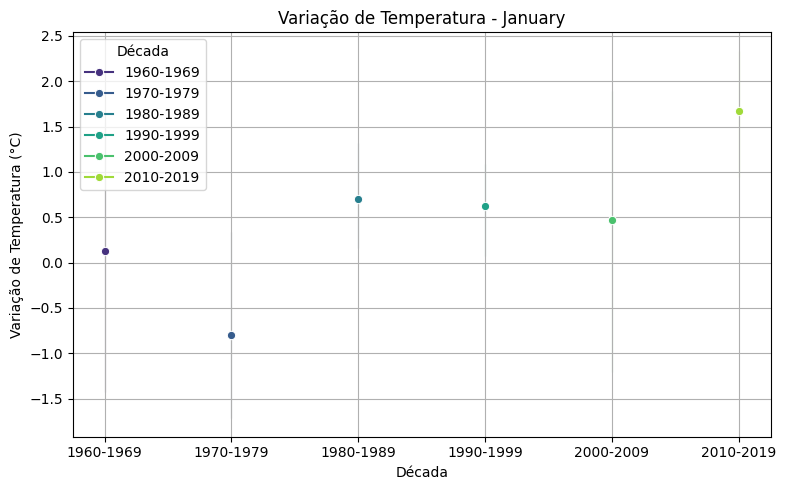

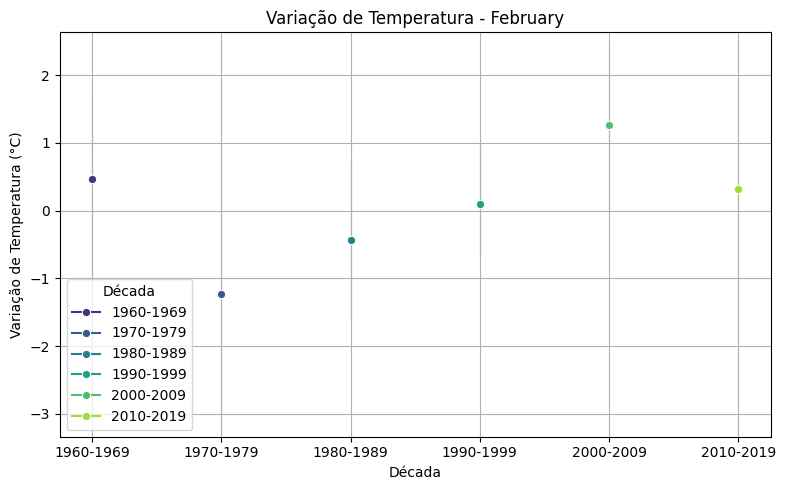

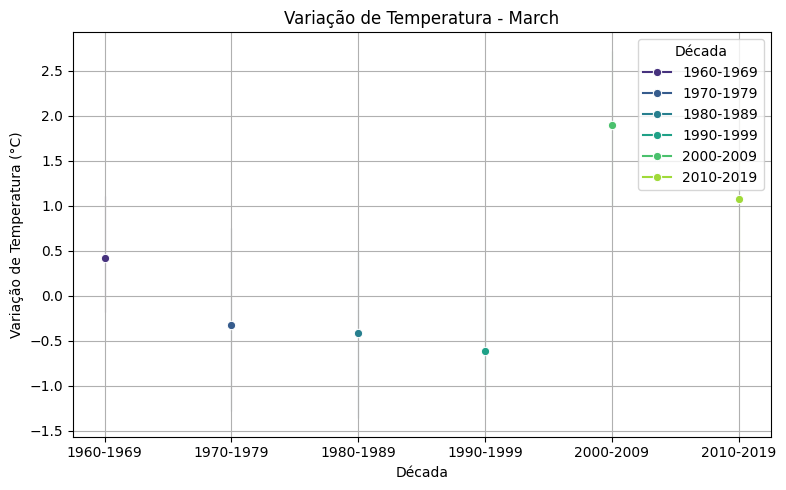

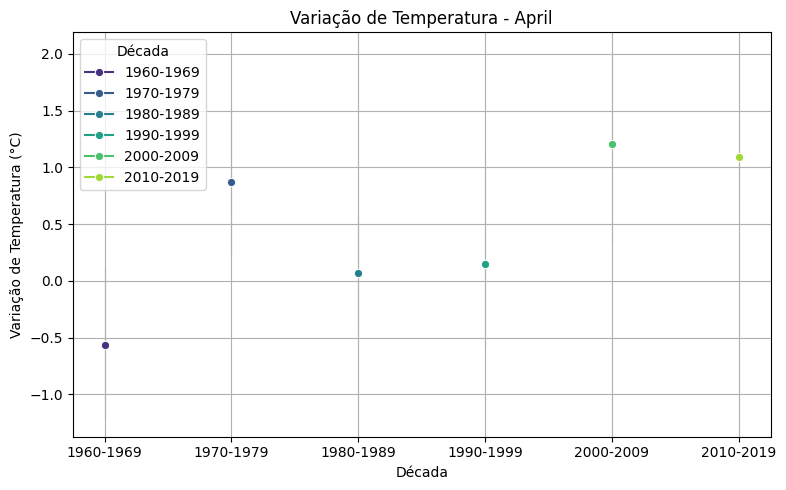

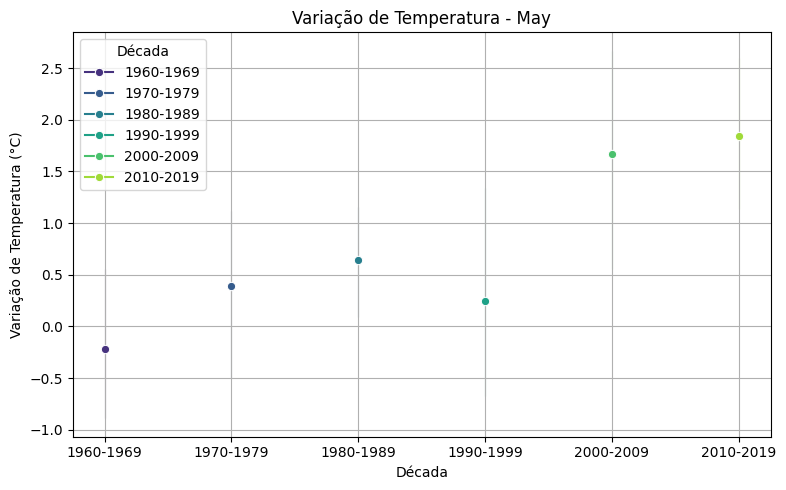

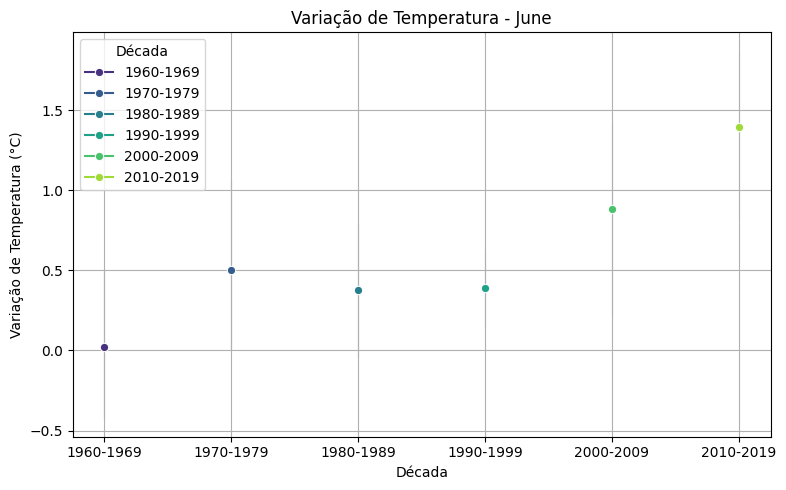

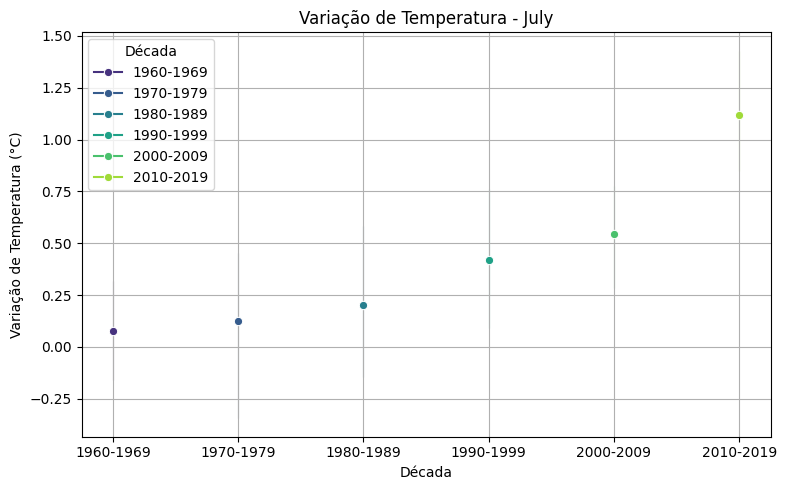

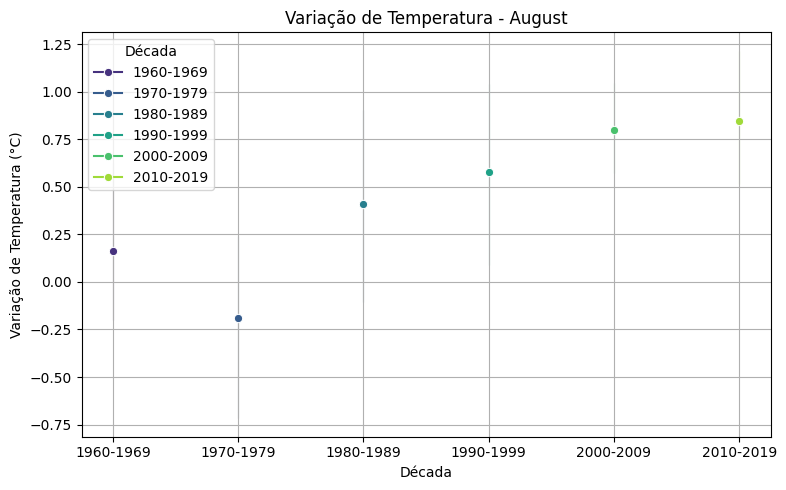

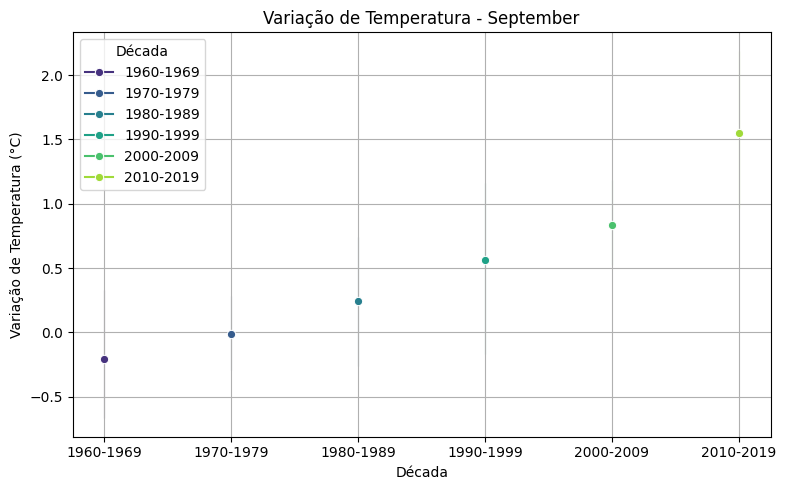

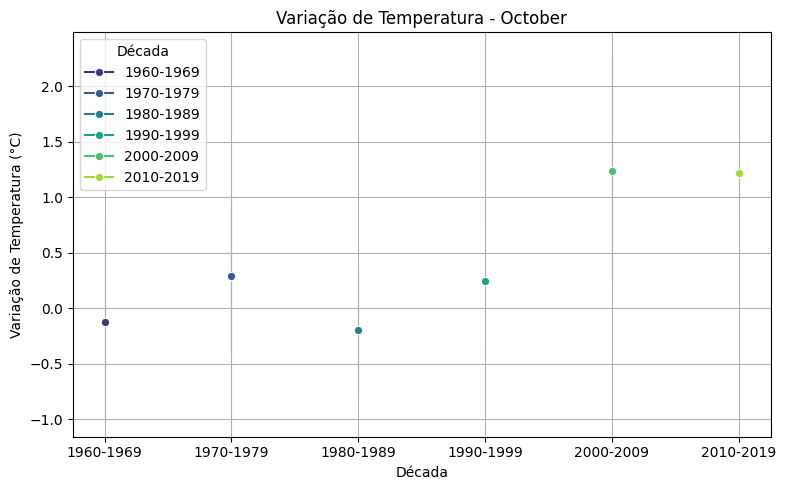

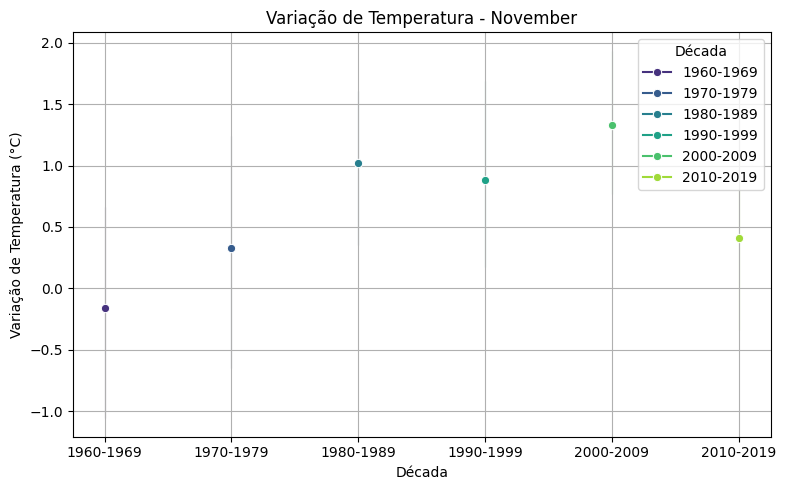

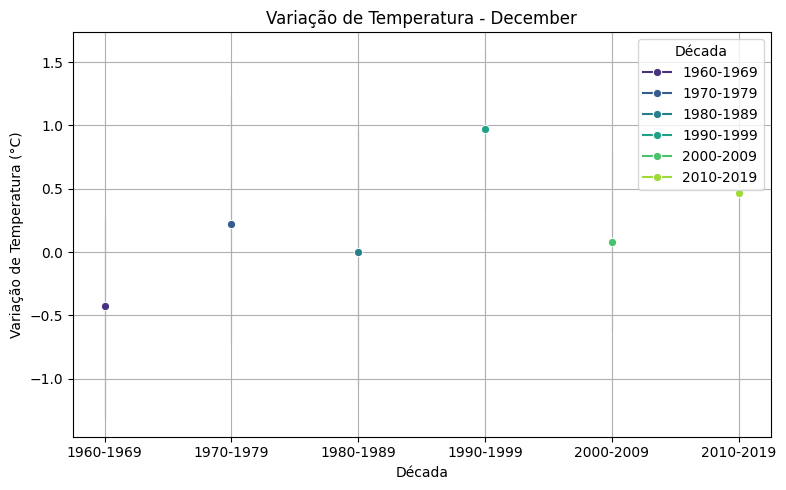

In [ ]:
# Adicione uma coluna no DataFrame para representar os intervalos de 10 anos
afghanistan_data_12_months['Decade'] = pd.cut(afghanistan_data_12_months.index.astype(int), bins=range(1960, 2021, 10), labels=[f'{i}-{i+9}' for i in range(1960, 2020, 10)])


meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


for mes in meses:
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=afghanistan_data_12_months, x='Decade', y=mes, hue='Decade', palette='viridis', marker='o')
    plt.title(f'Variação de Temperatura - {mes}')
    plt.xlabel('Década')
    plt.ylabel('Variação de Temperatura (°C)')
    plt.legend(title='Década')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'grafico_variacao_temperatura_{mes}.png')
    plt.show()

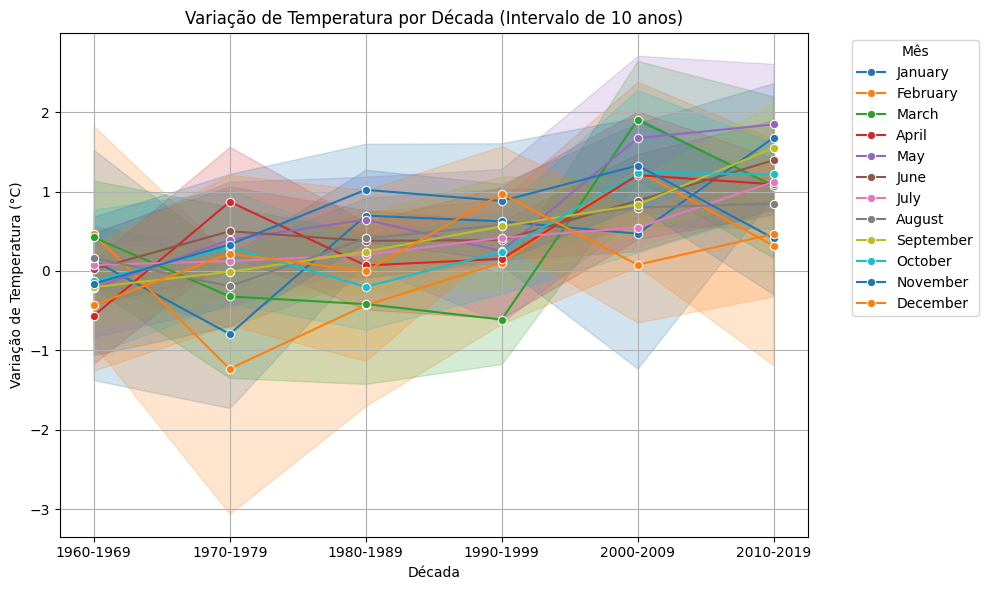

In [ ]:

afghanistan_data_12_months['Decade'] = pd.cut(afghanistan_data_12_months.index.astype(int), bins=range(1960, 2021, 10), labels=[f'{i}-{i+9}' for i in range(1960, 2020, 10)])

meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 6))
for mes in meses:
    sns.lineplot(data=afghanistan_data_12_months, x='Decade', y=mes, label=mes, marker='o')
plt.title('Variação de Temperatura por Década (Intervalo de 10 anos)')
plt.xlabel('Década')
plt.ylabel('Variação de Temperatura (°C)')
plt.legend(title='Mês', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('grafico_variacao_temperatura_por_mes.png')
plt.show()  # Exiba o gráfico

<ipython-input-32-842d9ca505c7>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=afghanistan_data_12_months, x='Decade', y=mes, label=mes, marker='o', ci=None)
<ipython-input-32-842d9ca505c7>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=afghanistan_data_12_months, x='Decade', y=mes, label=mes, marker='o', ci=None)
<ipython-input-32-842d9ca505c7>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=afghanistan_data_12_months, x='Decade', y=mes, label=mes, marker='o', ci=None)
<ipython-input-32-842d9ca505c7>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=afghanistan_data_12_months, x='Decade', y=mes, label=mes, marker='o', ci=None)
<ipython-input-32-842d9ca505c7>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `e

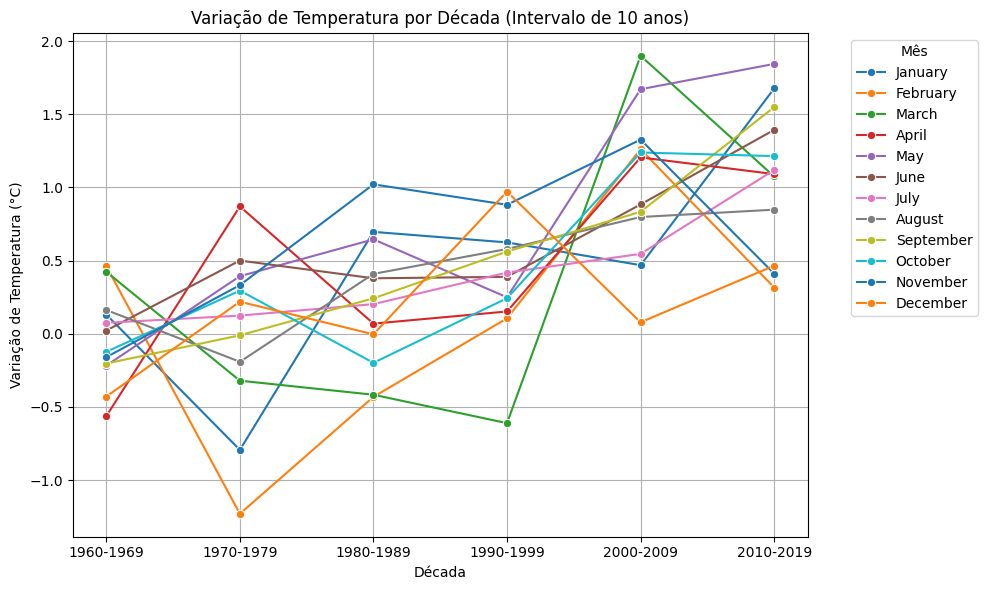

In [ ]:

afghanistan_data_12_months['Decade'] = pd.cut(afghanistan_data_12_months.index.astype(int), bins=range(1960, 2021, 10), labels=[f'{i}-{i+9}' for i in range(1960, 2020, 10)])


meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


plt.figure(figsize=(10, 6))
for mes in meses:
    sns.lineplot(data=afghanistan_data_12_months, x='Decade', y=mes, label=mes, marker='o', ci=None)
plt.title('Variação de Temperatura por Década (Intervalo de 10 anos)')
plt.xlabel('Década')
plt.ylabel('Variação de Temperatura (°C)')
plt.legend(title='Mês', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('grafico_variacao_temperatura_por_mes_sem_linhas_margem.png')
plt.show()

# 5) Preparação de Dados Para Aplicar no Modelo

Aqui, os dados utilizados foram especificamente do mês de maio, que foi o mês mais quentte registtrado no afeganisttão

In [ ]:
afghanistan_data_12_months

Months,January,February,March,April,May,June,July,August,September,October,November,December,Decade
1961,0.777,-1.743,0.516,-1.709,1.412,-0.058,0.884,0.391,1.445,-1.102,-0.540,0.600,1960-1969
1962,0.062,2.465,1.336,0.117,-0.092,-1.061,0.292,-0.220,-1.797,-0.968,-2.171,-0.721,1960-1969
1963,2.744,3.919,0.403,0.919,-0.690,1.164,0.348,0.094,0.163,1.654,0.584,-0.603,1960-1969
1964,-5.232,-0.202,1.659,-0.533,-0.160,-0.519,-0.142,0.671,-0.253,-2.839,-0.574,-3.636,1960-1969
1965,1.868,-0.096,-0.909,-1.816,-0.190,-0.422,0.116,-0.686,-0.661,2.211,1.820,-1.115,1960-1969
1966,3.629,3.397,-0.069,-1.192,-0.192,1.274,-0.267,0.049,-0.403,-0.428,-2.574,-0.327,1960-1969
1967,-1.432,0.296,-0.759,-1.496,-1.307,-0.722,0.332,0.055,0.583,-0.800,1.245,-0.347,1960-1969
1968,0.389,-2.055,0.496,-0.590,-1.841,0.292,-0.256,-0.155,-0.269,-0.611,0.471,0.056,1960-1969
1969,-2.298,-3.167,2.481,-0.770,-0.977,-0.270,-0.024,-0.442,-0.847,1.103,-0.742,1.985,1960-1969
1970,0.804,1.809,-0.915,1.439,1.864,0.544,-0.534,1.867,0.005,0.542,0.881,-0.186,1960-1969


In [ ]:
colunas_recortadas_afg = afghanistan_data_12_months[['May']]

In [ ]:
df_afg = pd.DataFrame(colunas_recortadas_afg)

In [ ]:
df_afg.describe()

Months,May
count,59.000000
mean,0.746237
std,1.512129
min,-2.530000
25%,-0.191000
50%,0.819000
75%,1.498500
max,4.103000


In [ ]:
df_afg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 1961 to 2019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   May     59 non-null     float64
dtypes: float64(1)
memory usage: 3.0+ KB


In [ ]:
df_afg

Months,May
1961,1.412
1962,-0.092
1963,-0.690
1964,-0.160
1965,-0.190
1966,-0.192
1967,-1.307
1968,-1.841
1969,-0.977
1970,1.864


In [ ]:

df_afg.rename(columns={'May': 'May Temperature'}, inplace=True)


In [ ]:
df_afg

Months,May Temperature
1961,1.412
1962,-0.092
1963,-0.690
1964,-0.160
1965,-0.190
1966,-0.192
1967,-1.307
1968,-1.841
1969,-0.977
1970,1.864


In [ ]:
df_afg = df_afg.reset_index().rename(columns={'Months': 'Year'})

In [ ]:
df_afg.rename(columns={'index': 'Years'}, inplace=True)


In [ ]:
df_afg

Months,Years,May Temperature
0,1961,1.412
1,1962,-0.092
2,1963,-0.690
3,1964,-0.160
4,1965,-0.190
5,1966,-0.192
6,1967,-1.307
7,1968,-1.841
8,1969,-0.977
9,1970,1.864


# 5) Construção do modelo

Construção do modelo e resultados

RMSE ARIMA: 1.8003147971277826


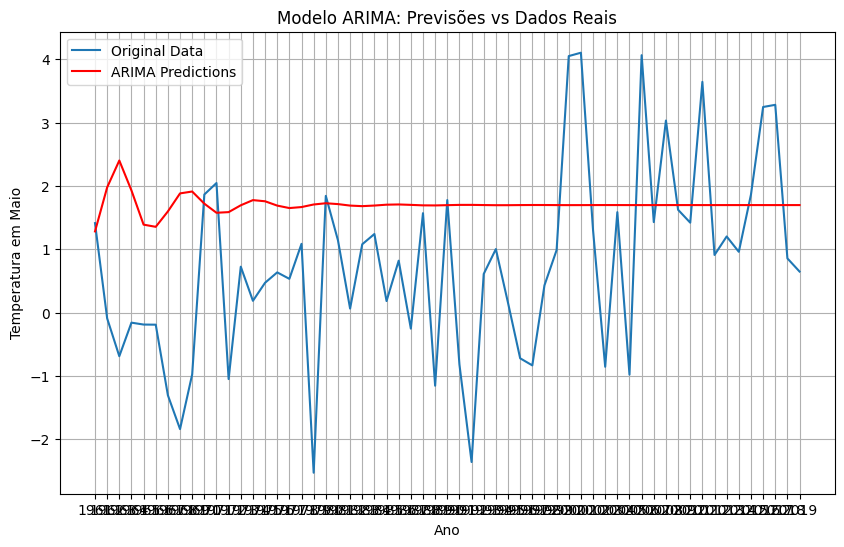

In [ ]:

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

X = df_afg['Years']
y = df_afg['May Temperature']


model_arima = ARIMA(y, order=(5, 1, 0))
model_fit = model_arima.fit()


y_pred_arima = model_fit.forecast(steps=len(y))


rmse_arima = mean_squared_error(y, y_pred_arima, squared=False)
print(f"RMSE ARIMA: {rmse_arima}")

plt.figure(figsize=(10, 6))
plt.plot(X, y, label='Original Data')
plt.plot(X, y_pred_arima, color='red', label='ARIMA Predictions')
plt.xlabel('Ano')
plt.ylabel('Temperatura em Maio')
plt.title('Modelo ARIMA: Previsões vs Dados Reais')
plt.legend()
plt.grid(True)
plt.show()


RMSE ARIMA: 1.8003147971277826


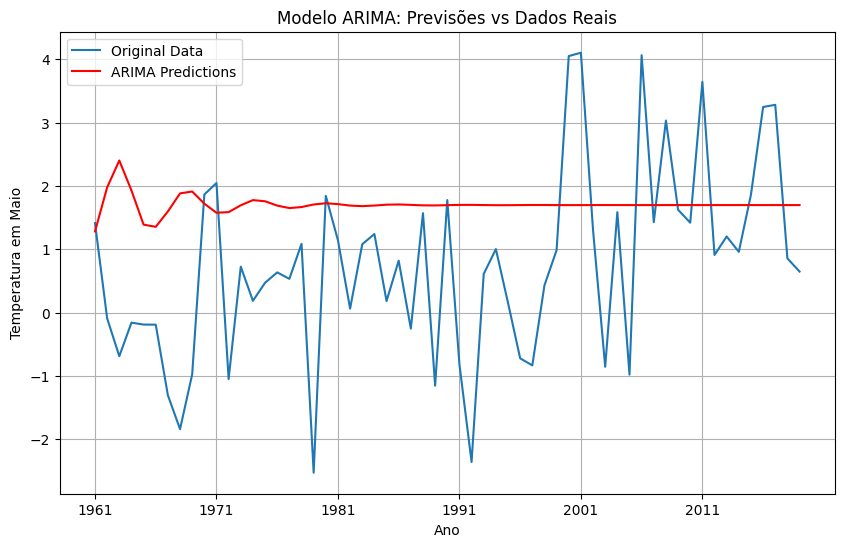

In [ ]:

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


X = df_afg['Years']
y = df_afg['May Temperature']


X = X.astype(int)


model_arima = ARIMA(y, order=(5, 1, 0))
model_fit = model_arima.fit()

# Fazer previsões com o modelo ajustado
y_pred_arima = model_fit.forecast(steps=len(y))


rmse_arima = mean_squared_error(y, y_pred_arima, squared=False)
print(f"RMSE ARIMA: {rmse_arima}")

plt.figure(figsize=(10, 6))
plt.plot(X, y, label='Original Data')
plt.plot(X, y_pred_arima, color='red', label='ARIMA Predictions')
plt.xlabel('Ano')
plt.ylabel('Temperatura em Maio')
plt.title('Modelo ARIMA: Previsões vs Dados Reais')
plt.legend()
plt.grid(True)

# Ajustar os rótulos e ticks do eixo X para intervalos de 10 anos
years_interval = np.arange(X.min(), X.max() + 1, 10)  # Intervalo de 10 anos
plt.xticks(years_interval)

plt.show()


RMSE ARIMA: 2.7679387585436848


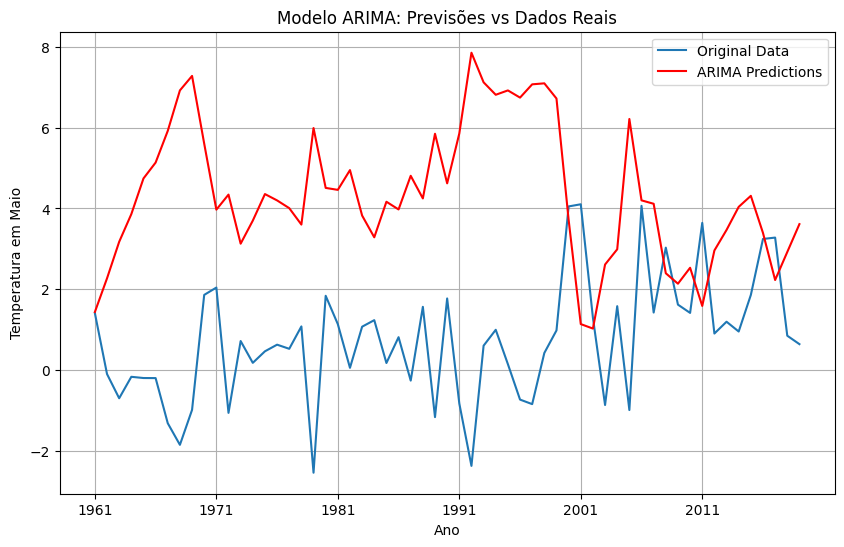

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Supondo que df_afg seja seu DataFrame com os dados de temperatura
# Certifique-se de que os dados estejam carregados corretamente antes de continuar

# Verificar e ajustar a estacionariedade, se necessário
# Por exemplo, se a série não for estacionária, você pode aplicar diferenciação
df_afg['May Temperature Diff'] = df_afg['May Temperature'].diff().fillna(0)

# Separar os dados em variáveis independentes (X) e dependentes (y)
X = df_afg['Years'].astype(int)
y = df_afg['May Temperature Diff']  # Usando a série diferenciada para modelagem

# Ajustar o modelo ARIMA
model_arima = ARIMA(y, order=(5, 0, 0))  # Utilizando (p=5, d=0, q=0) como exemplo
model_fit = model_arima.fit()

# Fazer previsões com o modelo ajustado
y_pred_arima = model_fit.predict(start=1, end=len(y))

# Calcular o RMSE
rmse_arima = mean_squared_error(y, y_pred_arima, squared=False)
print(f"RMSE ARIMA: {rmse_arima}")

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(X, df_afg['May Temperature'], label='Original Data')
plt.plot(X, df_afg['May Temperature'].iloc[0] + y_pred_arima.cumsum(), color='red', label='ARIMA Predictions')
plt.xlabel('Ano')
plt.ylabel('Temperatura em Maio')
plt.title('Modelo ARIMA: Previsões vs Dados Reais')
plt.legend()
plt.grid(True)

# Ajustar os rótulos e ticks do eixo X para intervalos de 10 anos
years_interval = np.arange(X.min(), X.max() + 1, 10)  # Intervalo de 10 anos
plt.xticks(years_interval)

plt.show()


RMSE ARIMA: 2.7679387585436848


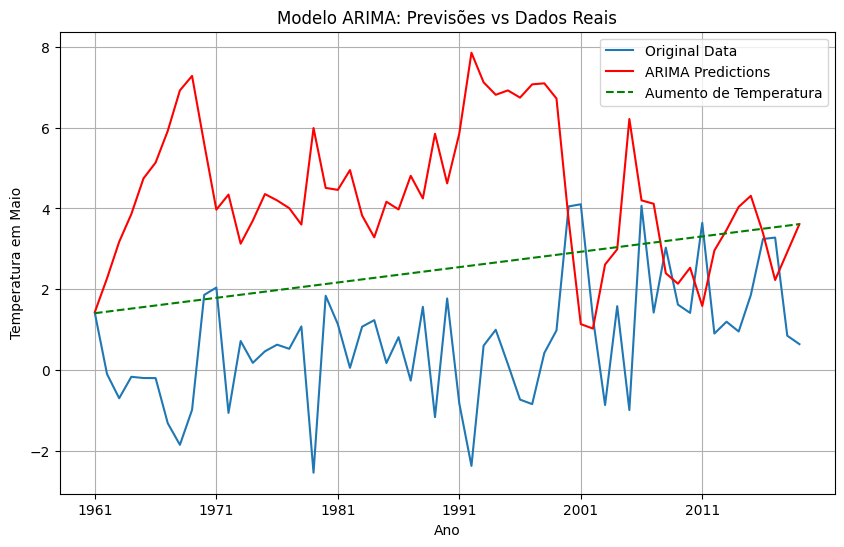

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Supondo que df_afg seja seu DataFrame com os dados de temperatura
# Certifique-se de que os dados estejam carregados corretamente antes de continuar

# Verificar e ajustar a estacionariedade, se necessário
# Por exemplo, se a série não for estacionária, você pode aplicar diferenciação
df_afg['May Temperature Diff'] = df_afg['May Temperature'].diff().fillna(0)

# Separar os dados em variáveis independentes (X) e dependentes (y)
X = df_afg['Years'].astype(int)
y = df_afg['May Temperature Diff']  # Usando a série diferenciada para modelagem

# Ajustar o modelo ARIMA
model_arima = ARIMA(y, order=(5, 0, 0))  # Utilizando (p=5, d=0, q=0) como exemplo
model_fit = model_arima.fit()

# Fazer previsões com o modelo ajustado
y_pred_arima = model_fit.predict(start=1, end=len(y))

# Calcular o RMSE
rmse_arima = mean_squared_error(y, y_pred_arima, squared=False)
print(f"RMSE ARIMA: {rmse_arima}")

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(X, df_afg['May Temperature'], label='Original Data')
plt.plot(X, df_afg['May Temperature'].iloc[0] + y_pred_arima.cumsum(), color='red', label='ARIMA Predictions')
plt.xlabel('Ano')
plt.ylabel('Temperatura em Maio')
plt.title('Modelo ARIMA: Previsões vs Dados Reais')
plt.legend()
plt.grid(True)

# Traçar uma reta entre os dois plots
plt.plot([X.min(), X.max()], [df_afg['May Temperature'].iloc[0], df_afg['May Temperature'].iloc[0] + y_pred_arima.sum()], linestyle='--', color='green', label='Aumento de Temperatura')

# Ajustar os rótulos e ticks do eixo X para intervalos de 10 anos
years_interval = np.arange(X.min(), X.max() + 1, 10)  # Intervalo de 10 anos
plt.xticks(years_interval)

# Adicionar legenda
plt.legend()

plt.show()
